<a href="https://colab.research.google.com/github/rmahesh6386/DataScience_Python/blob/main/Assignment_04_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment_04_Q1

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [124]:
df=pd.read_csv('delivery_time.csv')
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


EDA and Data Visualization

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


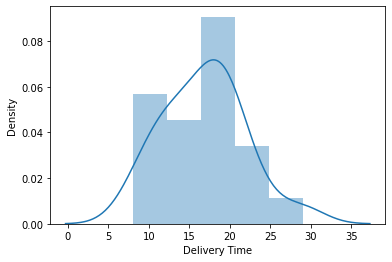

In [88]:
sns.distplot(df['Delivery Time'])

from the graph we can see that delivery time is slightly positively skewed data and mean between 15 and 18.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


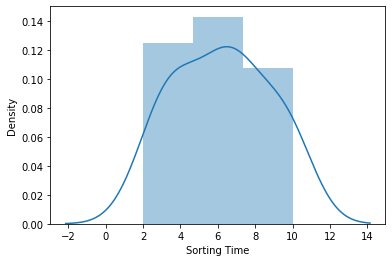

In [89]:
sns.distplot(df['Sorting Time'])

from the graph we can see that sorting time is uniformly distributed data and mean likelt to be at 7.

In [90]:
# Renaming Columns
df=df.rename({'Delivery Time':'Delivery_Time', 'Sorting Time':'Sorting_Time'},axis=1)
df.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [91]:
df.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


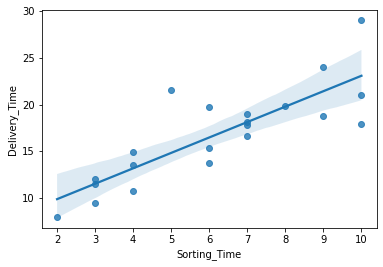

In [92]:
sns.regplot(x=df['Sorting_Time'],y=df['Delivery_Time'])

the correlation analysis tells that Delivery Time and Sorting Time are strongly positively related which is clearly evident fron the regression plot graph
 

In [93]:
model=smf.ols("Delivery_Time~Sorting_Time",data=df).fit()

In [94]:
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [95]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 15 Jun 2022   Prob (F-statistic):           3.98e-06
Time:                        11:30:12   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
 # prediction of delivery time for say sorting time 15
del_time = (6.5827) + (1.6490)*(15)
del_time

31.3177

In [97]:
# Prediction model for say sorting time 10, 15
new_data=pd.Series([10,15])
new_data

0    10
1    15
dtype: int64

In [98]:
new_data=pd.DataFrame(new_data,columns=['Sorting_Time'])
new_data

,Sorting_Time
0,10
1,15


In [99]:
model.predict(new_data)

0    23.072933
1    31.318032
dtype: float64

In [100]:
df1 = df

In [101]:
df1['Sorting_Time2'] = df1['Sorting_Time']**2

In [102]:
model_1 = smf.ols("Delivery_Time~Sorting_Time2",data = df1).fit()

In [103]:
model_1.params

Intercept        11.237205
Sorting_Time2     0.124870
dtype: float64

In [104]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     32.39
Date:                Wed, 15 Jun 2022   Prob (F-statistic):           1.74e-05
Time:                        11:30:12   Log-Likelihood:                -52.948
No. Observations:                  21   AIC:                             109.9
Df Residuals:                      19   BIC:                             112.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        11.2372      1.196      9.399      0.000       8.735      13.740
Sorting_Time2     0.1249      0.022      5.691      0.000       0.079       0.171
==============================================================================
Omnibus:                        1.531   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.465   Jarque-Bera (JB):                0.772
Skew:                           0.469   Prob(JB):                        0.680
Kurtosis:                       3.050   Cond. No.                         94.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
df1['log_Sorting_Time'] = np.log(df1['Sorting_Time'])

In [106]:
df1.head(3)

,Delivery_Time,Sorting_Time,Sorting_Time2,log_Sorting_Time
0,21.00,10,100,2.302585
1,13.50,4,16,1.386294
2,19.75,6,36,1.791759


In [107]:
model_2= smf.ols('Delivery_Time	~log_Sorting_Time', data=df1).fit()

In [108]:
model_2.params

Intercept           1.159684
log_Sorting_Time    9.043413
dtype: float64

In [109]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Wed, 15 Jun 2022   Prob (F-statistic):           2.64e-06
Time:                        11:30:12   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.1597      2.455      0.472      0.642      -3.978       6.297
log_Sorting_Time     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
df1['sqrt_Sorting_Time'] = df1['Sorting_Time']**(1/2)

In [111]:
df1.head(3)

,Delivery_Time,Sorting_Time,Sorting_Time2,log_Sorting_Time,sqrt_Sorting_Time
0,21.00,10,100,2.302585,3.162278
1,13.50,4,16,1.386294,2.000000
2,19.75,6,36,1.791759,2.449490


In [112]:
model_3= smf.ols('Delivery_Time	~sqrt_Sorting_Time', data=df1).fit()

In [113]:
model_3.params

Intercept           -2.518837
sqrt_Sorting_Time    7.936591
dtype: float64

In [114]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Wed, 15 Jun 2022   Prob (F-statistic):           2.61e-06
Time:                        11:30:12   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -2.5188      2.995     -0.841      0.411      -8.788       3.751
sqrt_Sorting_Time     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [115]:
#Since the variable transformation doesn't seem to show enough improvement on r squared value 
#hence we can finalise the result of model_2 as the best model

In [116]:
model_final = model_2

In [117]:
new_data['log_Sorting_Time'] = np.log(new_data['Sorting_Time'])

In [118]:
new_data.head(3)

,Sorting_Time,log_Sorting_Time
0,10,2.302585
1,15,2.708050


In [119]:
pred_data = model_final.predict(new_data)
pred_data

0    21.982913
1    25.649701
dtype: float64

In [122]:
new_data['Predicted_Delivery_Time'] = pred_data
new_data

,Sorting_Time,log_Sorting_Time,Predicted_Delivery_Time
0,10,2.302585,21.982913
1,15,2.708050,25.649701
